Parte	1:	Limpieza	y	análisis	de	datos

In [ ]:
#Paso 1:	Limpieza	de	datos
import pandas as pd
import numpy as np

In [ ]:
#a)	Lea	los	datos	de	rpi_data_compact.csv.¶
df_compact = '/content/rpi_data_compact.csv'
df_compact = pd.read_csv(df_compact)
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [ ]:
#b)	Elimine	las	columnas	no	deseadas.¶
df_compact.drop(['Unnamed: 0'], axis=1, inplace=True)
df_compact

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [ ]:
#c)	Elimine	los	valores	NaN.¶
df_compact = df_compact.dropna()
df_compact

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


In [ ]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            0
Download (Mbit/s)    0
Upload (Mbit/s)      0
Date                 0
Time                 0
dtype: int64

In [ ]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

0

In [ ]:
df_compact.isnull().sum().sum()

0

In [ ]:
df_compact_clean = df_compact.dropna()
df_compact

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


In [ ]:
#d)	Cambie	el	formato	de	los	valores.¶
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
df_compact_clean['Ping (ms)'] = df_compact_clean['Ping (ms)'].astype(float)
df_compact_clean['Download (Mbit/s)'] = df_compact_clean['Download (Mbit/s)'].astype(float)
df_compact_clean.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
df_compact.columns = ['Ping (ms)_float','Download (Mbit/s)_float','Upload (Mbit/s)', 'Date', 'Time']
df_compact

,Ping (ms)_float,Download (Mbit/s)_float,Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


In [ ]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [ ]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [ ]:
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)
df_clean = df_compact_clean

Paso	2:	Estadísticas	básicas¶

In [ ]:
means = df_clean.mean()
stands = df_clean.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#a)	Calcule	el	promedio	y	la	desviación	estándar	con	Pandas.¶
stats_ping = (means['Ping (ms)'], stands ['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands ['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands ['Upload (Mbit/s)'])

print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(stats_download[0],stats_download[1]))
print('Average upload speed: {} ± {} Mbit/s'.format(stats_upload[0],stats_upload[1]))

Average ping time: 21.115451708766717 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.465647031815227 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031766 Mbit/s


In [ ]:
# b)	Calcule	la	desviación	mínima	y	máxima	con	Pandas.¶
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [ ]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()
argmin_ping


217

In [ ]:
argmax_ping

461

In [ ]:
mindate= df_clean.loc[argmin_ping].Date
mindate

'2016-11-24'

In [ ]:
mintime = df_clean.loc[argmin_ping].Time

In [ ]:
maxdate = df_clean.loc[argmax_ping].Date

In [ ]:
maxtime = df_clean.loc[argmax_ping].Time

In [ ]:
print('Ping measure reached minimum on {} at {}'.format(mindate,mintime))
print('Ping measure reached maximun on {} at {}'.format(maxdate,maxtime))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Ping measure reached maximun on 2016-11-24 at 17:30:06


In [ ]:
#e)	Cree	una	correlación.¶
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


Parte	2:	Visualización	de	datos¶


In [ ]:
#Paso	1:	Crear	una	primera	visualización	de	los	datos	de	la	velocidad	de	Internet¶
import matplotlib.pyplot as plt
%matplotlib inline

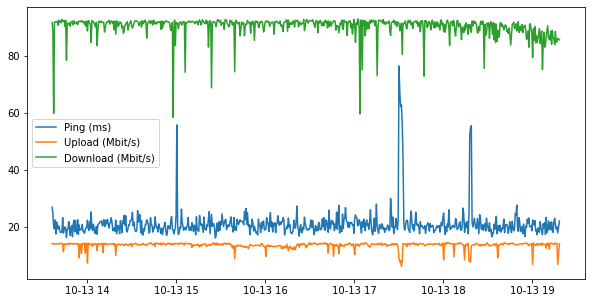

In [ ]:
#b)	Cree	un	gráfico	con	las	estadísticas	de	la	velocidad	de	Internet¶
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.legend()

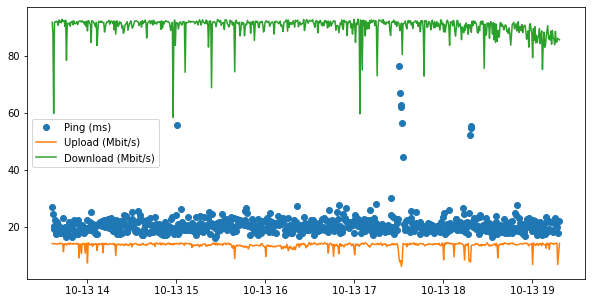

In [ ]:
#c)	Cambie	el	estilo	de	línea.¶
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], "o" ,label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'],label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.legend()

<Figure size 432x288 with 0 Axes>

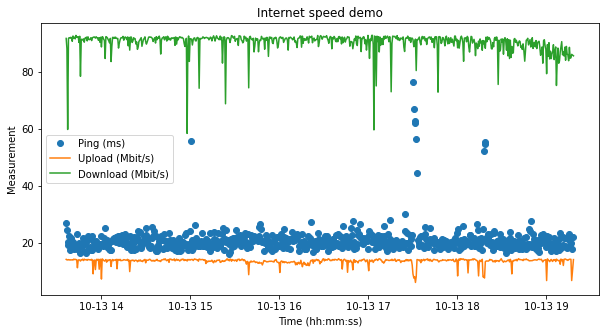

<Figure size 432x288 with 0 Axes>

In [ ]:
#d)	Agregue	etiquetas	a	los	ejes.¶
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], "o" ,label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.set_title('Internet speed demo')
ax.set_ylabel('Measurement')
ax.set_xlabel('Time (hh:mm:ss)')
ax.legend()
plt.figure()

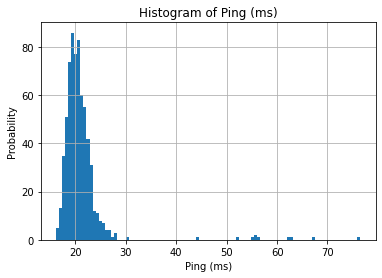

In [ ]:
#f)	Cree	un	histograma¶
nbins = 100
pingHist = plt.hist(df_clean['Ping (ms)'], nbins)
plt.xlabel('Ping (ms)')
plt.ylabel('Probability')
plt.title('Histogram of Ping (ms)')
plt.grid(True)

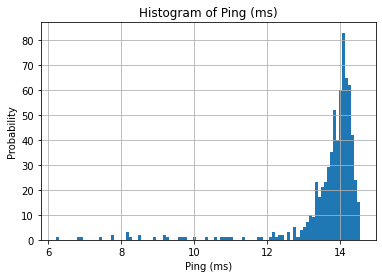

In [ ]:
nbins = 100
pingHist = plt.hist(df_clean['Upload (Mbit/s)'], nbins)
plt.xlabel('Ping (ms)')
plt.ylabel('Probability')
plt.title('Histogram of Ping (ms)')
plt.grid(True)

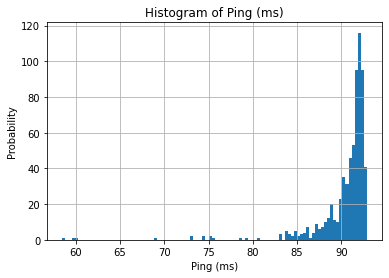

In [ ]:
nbins = 100
pingHist = plt.hist(df_clean['Download (Mbit/s)'], nbins)
plt.xlabel('Ping (ms)')
plt.ylabel('Probability')
plt.title('Histogram of Ping (ms)')
plt.grid(True)

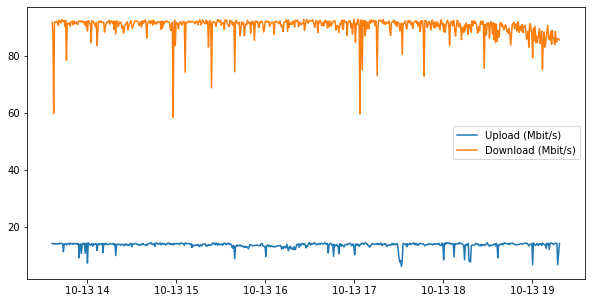

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s) ')
ax.plot(t , df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax .legend()
plt.show()